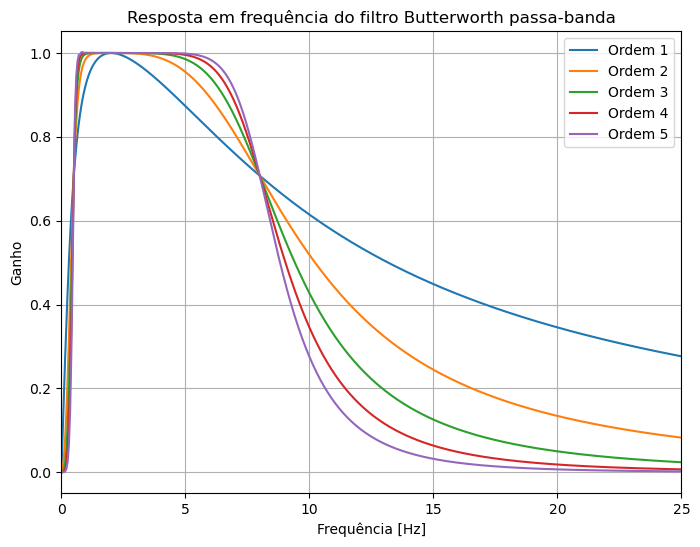

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, freqz

# Define sampling parameters and bandpass edges (in Hz)
fs = 200    # Sampling frequency (Hz)
lowcut = 0.5    # Low cutoff frequency (Hz)
highcut = 8   # High cutoff frequency (Hz)

# Normalize frequencies by the Nyquist frequency
nyq = 0.5 * fs
low = lowcut / nyq
high = highcut / nyq

# List of filter orders to examine
orders = [1, 2, 3, 4, 5]

# Create a new plot
plt.figure(figsize=(8, 6))

# Loop through the different orders and compute the frequency response
for order in orders:
    # Create Butterworth bandpass filter coefficients
    b, a = butter(order, [low, high], btype='bandpass')
    
    # Compute the frequency response
    w, h = freqz(b, a, worN=2000)
    
    # Convert digital frequencies to Hz
    freqs = (w / np.pi) * nyq
    
    # Plot the magnitude of the frequency response
    plt.plot(freqs, np.abs(h), label=f'Ordem {order}')

# Labeling the plot
plt.xlabel('Frequência [Hz]')
plt.ylabel('Ganho')
plt.title('Resposta em frequência do filtro Butterworth passa-banda')
plt.legend(loc='best')
plt.xlim([0, 25])
plt.grid(True)
plt.show()


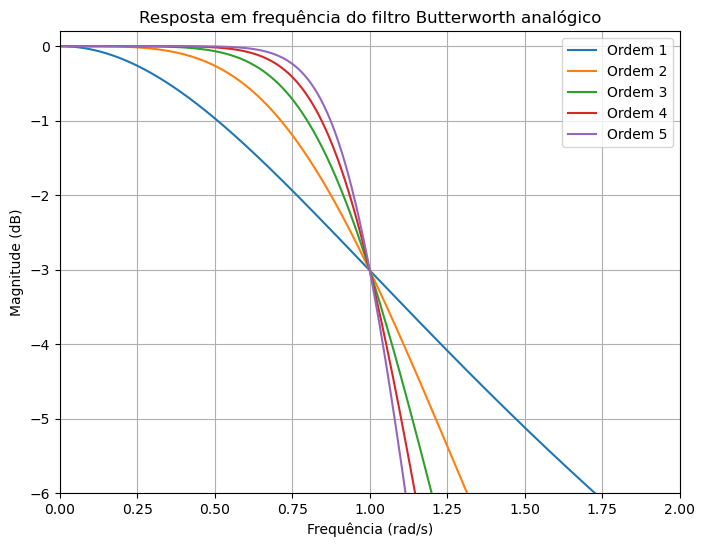

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, freqs

# Define filter parameters
# For analog filters, set the cutoff frequency in rad/s.
cutoff = 1  # 1 rad/s cutoff frequency (normalized for analog design)
order_list = [1, 2, 3, 4, 5]  # Different orders to compare

# Create a frequency range for evaluation (in rad/s)
# (Adjust the upper limit if needed; here we use 0 to 2 rad/s to match the book's figure.)
w = np.linspace(0, 2, 800)

plt.figure(figsize=(8, 6))

for order in order_list:
    # Get Butterworth filter coefficients for an analog low-pass filter
    b, a = butter(order, cutoff, btype='low', analog=True)
    
    # Compute the analog frequency response using freqs
    w, h = freqs(b, a, w)
    
    # Convert magnitude response to decibels (dB)
    h_db = 20 * np.log10(np.abs(h))
    
    # Plot the frequency response (w is in rad/s)
    plt.plot(w, h_db, label=f'Ordem {order}')

plt.title('Resposta em frequência do filtro Butterworth analógico')
plt.xlabel('Frequência (rad/s)')
plt.ylabel('Magnitude (dB)')
plt.legend()
plt.grid(True)
plt.ylim([-6, 0.2])
plt.xlim([0, 2])
plt.show()
